# Naive Bayes Classifier

## Intro
- merupakan teknik klasifikasi statistik berdasarkan Bayes Theorem
- Salah satu jenis suervised learning algoritma yang paling sederhana 
- merupakan algoritma yang cepat, akurat, dan handal, dan memiliki akurasi dan kecepatan tinggi pada saat digunakan pada kumpulan data yang besar
- metode ini mengaasumsikan bahwa efek fitur tertentu dalam kelas tidak bergantung pada fitur lainnya.
    - misalnya pada permohonan pinjaman akan diloloskan atau tidak tergantung pada pendapatannya, pinjaman sebelumnya dan riwayat transaksi, usia, dan lokasi. meskipun saling tergantung, fitur ini dianggap terpisah yang dapat menyederhanakan komputasi dan disebut sebagai naive

## Cara kerja
- studi kasus
    - suatu kondisi cuaca dan keputusan untuk bermain olahraga, jadi kita perlu menghitung kemungkinan untuk bermain olahraga, perlu mengklasifikasikan apakah pemain akan bermain atau tidak berdasarkan kondisi cuaca
        - Langkah 1: menghitung probabilitas sebelumnya untuk label kelas yang diberikan
        - Langkah 2: menemukan probabilitas Kemungkinan dengan setiap atribut untuk setiap kelas
        - Langkah 3: Masukkan nilai ini ke dalam Rumus Bayes dan hitung probabilitas posterior.
        - Langkah 4: Lihat kelas mana yang memiliki probabilitas lebih tinggi, mengingat input milik kelas probabilitas yang lebih tinggi.
        

## Naive Bayes Classifier Building in Scikit-learn

In [1]:
# menuliskan fitur dan variabel label
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
# Encoding Features (mengubah string menjadi angka)

# import labelenconder
from sklearn import preprocessing

#membuat labelenconder
le = preprocessing.LabelEncoder()

#mengkonversi label string ke angka
weather_encoded = le.fit_transform(weather)
temp_enconded = le.fit_transform(temp)
label = le.fit_transform(play)

print(weather_encoded)
print(temp_enconded)
print(label)

# mengkombinasi weather dan temperatur dalam single listof tuples
features = list(zip(weather_encoded, temp_enconded))
features




[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [3]:
# mulai memprediksi

#import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

# membuat klasifikasi Gausian
model = GaussianNB()

#train the model using the training sets
model.fit(features, label)

# output prediksi
predicted = model.predict([[0, 2]]) # 0 = overcast , 2 = mild
print('Predicted Value :', predicted)


Predicted Value : [1]


- 1 : Yes, maka prediknya bermain

## Naive Bayes with Multiple Labels

- dikenal sebagai multinominal naive bayes
- contoh : klasifikasi artikel berita bertema teknologi, hiburan, politik, atau olahraga

In [4]:
## Loading Data

# import scikit-learn dataset library
from sklearn import datasets

# load dataset
wine = datasets.load_wine()

#print nama dari 13 fitur
print('Features : ', wine.feature_names)

#print label (kategori kelas dari wine)
print('labes : ', wine.target_names)

#shape
print('data feature shape : ', wine.data.shape)

Features :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
labes :  ['class_0' 'class_1' 'class_2']
data feature shape :  (178, 13)


In [5]:
wine.data[0:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
# import train_test_split_function
from sklearn.model_selection import train_test_split

#split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size =0.3, random_state=109)

In [8]:
# import gaussian naive bayes model
from sklearn.naive_bayes import GaussianNB

#Membuat klasifikasi gaussian
gnb = GaussianNB()

# menguji model menggunakan set training
gnb.fit(X_train, y_train)

# memprediksi respon untuk dataset
y_pred = gnb.predict(X_test)

In [9]:
# import metrics modul untuk perhitungan akurasi

from sklearn import metrics

#model akurasi, seberaa seing prediksi benar ?
print('Akkurasi :', metrics.accuracy_score(y_test, y_pred) )

Akkurasi : 0.9074074074074074


# Decision Tree Classifier

## intro
- flowchart seperti struktur ranting pohon
    - internal node mewakili feature atau atribut, 
    - cabang ranting atau branch mewakili decision rule
    - setiap leaf node mewakili outcome
    - node paling atas dalam pohon keputusan dikenal sebagai root node.
        - root node belajar untuk mempartisi berdasarkan nilai atribut, secara rekrusif
- flowchart membantu untuk mengambil keputusan,
- visualisasinya seperti diagram flowchart yang mudah meniru pemikiran tingkat manusia, sehingga decision tree mudah dipahami dan diinterpretasikan

## How does it work?
- memilih atribut terbaik menggunakan ASM (Attribute Selection Measures) untuk membagi catatan (split the records)
- membuat atribut sebuah decision node dan breaks daaset menjadi subset yang lebih kecil
- memulai pembuatan pohon atau tree decision dengan mengulang proses ini secara rekrusif untuk setiap anak hingga salah satu merupakan kondisi yang cocok dengan kondisi berikut:
    - semua tuple memiliki nilai atribut yang sama
    - tidak ada lagi atribut yang tersisa
    - tidak ada lagi contoh

In [10]:
## Decision tree classifier building in scikit-learn

# Load Libraries
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# import train_test_split function
from sklearn.model_selection import train_test_split

# import scikit-learn metrics module for accurancy calculation
from sklearn import metrics

In [11]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [12]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [13]:
## Feature Selection
### perlu membagi kolom yang diberikan menjadi dua jenis variabel (dependen dan independen)

# memperoleh info
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [14]:
numer =['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree', 'label']
for col in numer:
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

pima.dropna(inplace=True)

In [15]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35,168.0,43.1,2.288,33.0,1.0


In [16]:
# split dataset in features and target variabel
feature_cols =['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X= pima[feature_cols] # fitur
y= pima.label #target

# split dataset info training set dan set test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

# membuat decision tree classifier object
clf = DecisionTreeClassifier()

# mrnguji decision tree classifier
clf = clf.fit(X_train, y_train)

# memprediksi respon dari dataset tes
y_pred = clf.predict(X_test)

# Model akurasi, seberapa sering akurasi benar?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


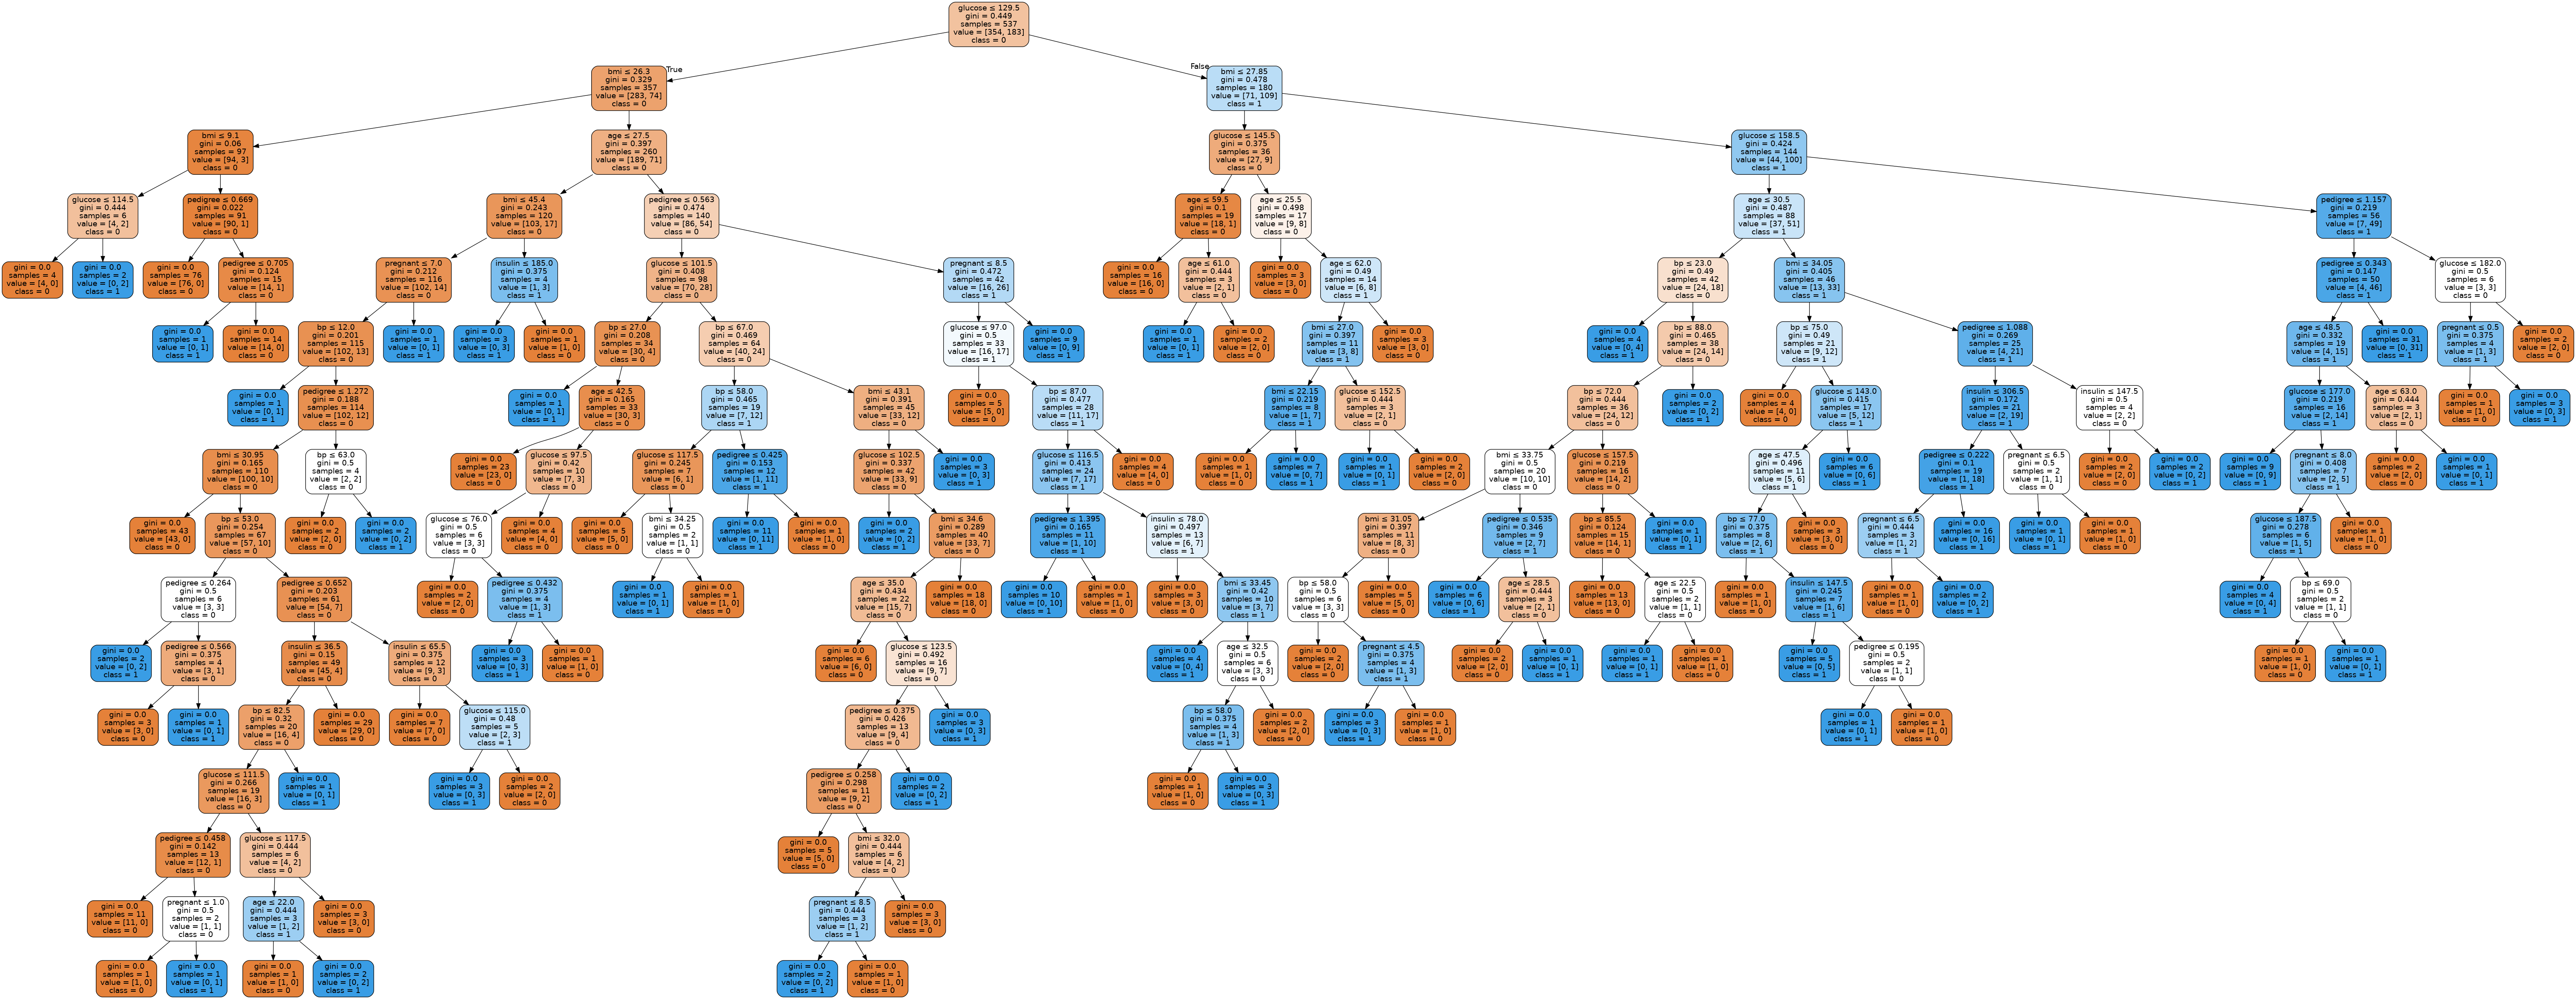

In [17]:
## Visualisasi Decision Tree
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Optimalisasi Decision Tree Performance
- criterion : opsional (default=”gini”) atau Pilih atribut selection meassure: Parameter ini memungkinkan kita untuk menggunakan ukuran pemilihan atribut yang berbeda-beda. Kriteria yang didukung adalah “gini” untuk indeks Gini dan “entropy” untuk perolehan informasi.
- splitter : string, optional (default=”best”) atau Split Strategy: Parameter ini memungkinkan kita untuk memilih strategi split. Strategi yang didukung adalah “best” untuk memilih split terbaik dan “random” untuk memilih split acak terbaik.
- max_depth : int atau None, optional (default=None) atau Maximum Depth of a Tree: Kedalaman maksimum pohon. Jika Tidak Ada, maka node diperluas hingga semua daun berisi kurang dari sampel min_samples_split. Nilai kedalaman maksimum yang lebih tinggi menyebabkan overfitting, dan nilai yang lebih rendah menyebabkan underfitting (Sumber).
- pengoptimalan dilakukan dengan pre-running maximum depth tree yang dapat digunakan sebagai variabel kontrol pre-running

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


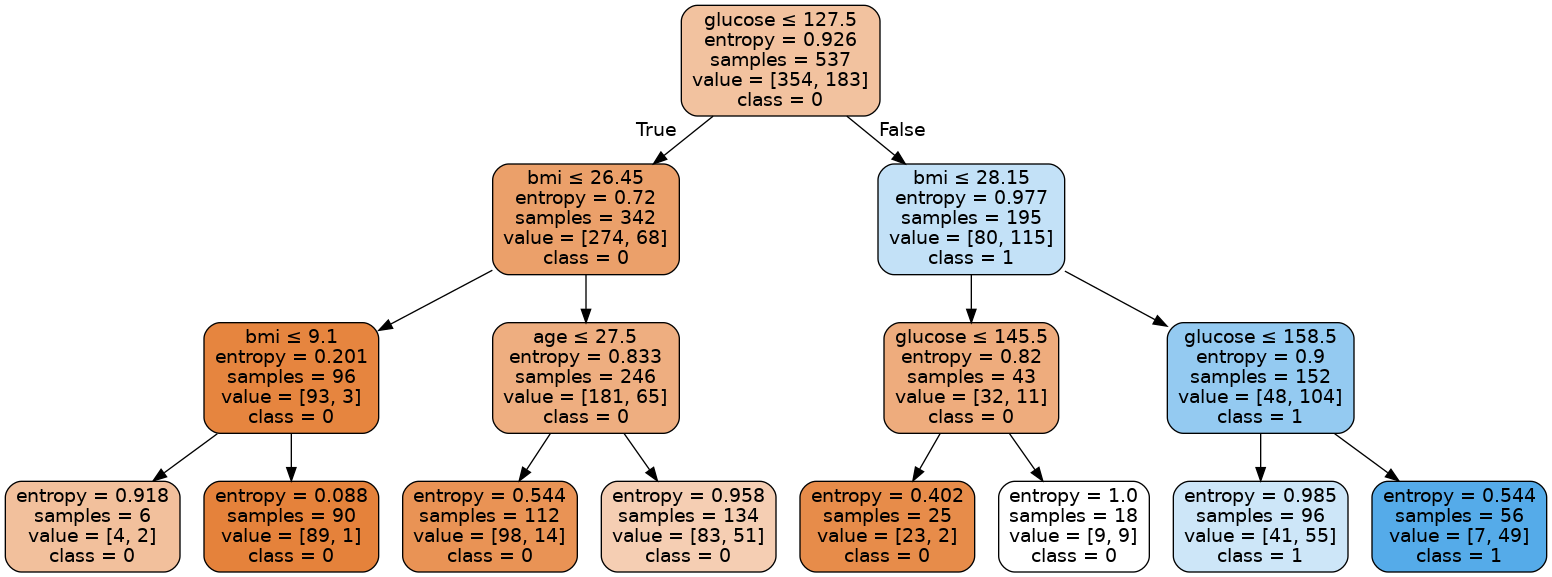

In [19]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Random Forest

## Intro
- merupakan ensamble method yang berdasarkan pendekatan divide-and-conquerdari decision trees yang dihasilkan pada dataset yang dipisahkan secara acak
- kumpulan dari decision tree classifiers dikenal sebagai forest
- decision trees individu dihasilkan dengan indikator pemilihan atribut seperti informasi gain, gain ratio, dan Gini index untuk setiap atribut
- setiap pohon bergantung pada sampel acak yang independen
- Pada masalah klasifikasi setiap pohon memilih dan kelas paling populer dipilih sebagai hasil akhir
- pada kasus regresi, rata - rata daru senya luaran pohon dianggap sebagai hasil akhir

## How does the algorithm work?
- bekerja dalam 4 tahap:
    - memilih random sample dari dataset yang diberikan
    - kontruksi sebuah decision tree untuk setiap sample dan mendapatkan prediksi dari setiap decision tree
    - menampilkan banyaknya suara pada setia hasil prediksi
    - menampilkan hasil prediksi dengan suara paling banyak pada prediksi akhir

## Menemukan fitur yang penting
- random forest menawarkan indikator feature selection yang baik
- dengan scikit-learn menunjukan importcance relatif atau kontribusi pada setiap fitur dalam prediksi
- Secara otomatis menghitung skor relevensi setiap fitur dalam fase training, sehingga menurunkan relevansi sehingga jumlah semua skor adalah 1
- Skor akan membantu kita untuk memilih fitur paling penting dan menghapus fitur paling tidak penting untuk membuat model
- Random forest menggunakan gini importance atau mean decrease in impurity (MDI) untuk menghitung tingkat importance setiap fitur

## Random Forests vs Decision Tree
- random forsts = lkumpulan dari beberapa decision tree
- deep decision tree mungkin mengalami overfitting, tetai random forests mencegah overfitting dengan membuat trees pada random subsets
- decision trees secara komputasi lebih cepat
- random forest sulit untuk diinterpretasikan sedangkan decision tree mudah diinterpretasikan dan dapat diubah menjadi rules


## Building a Classifier Using Scikit-learn

- membuat model pada kumpulan data iris flower yang merupakan kumpulan klasifikasi yang sangat terkenal
- terdiri dari sepal lenght, sepal width, petal length, petal width, dan jenis bunga
- tedapat tiga spesies atau kelas

In [20]:
# import scikit-learn dataset library
from sklearn import datasets

## load datasets
iris = datasets.load_iris()

In [21]:
## print the label species(setosa, versicolor,virginica)
print(iris.target_names) 

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [22]:
# print the iris data (top 5 records)
print(iris.data[0:5]) 

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:
## Creating a DataFrame of given iris dataset.
import pandas as pd

data=pd.DataFrame({    
    'sepal length':iris.data[:,0],    
    'sepal width':iris.data[:,1],    
    'petal length':iris.data[:,2],    
    'petal width':iris.data[:,3],    
    'species':iris.target 
}) 

data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
## memisahkan kolom variabel dependen dan independen 

# Import train_test_split function
from sklearn.model_selection import train_test_split 

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [25]:
## melatih model pada set training
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
 
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

In [26]:
## memeriksa akurasi

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [27]:
clf.predict([[3, 5, 4, 2]])

/home/jefl5/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

- 2 = jenis bunga virginica

## Finding important features in Scikit-learn

- dapat menemukan  fitur penting atau memilih fitur dalam dataset IRIS
    - 1 membuat random forest model
    - 2 menggunakan fitut prnting variabel untuk melihat score fitur yang penting
    - 3 visualisasi dengan score menggunakan seaborn library

In [28]:
from sklearn.ensemble import RandomForestClassifier

#membuat Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#menguji model menggunakan training sets y_pred 
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
RandomForestClassifier(bootstrap=True,
                                        class_weight= None,  
                                        criterion= 'gini',  
                                        max_depth=None,  
                                        max_features='auto',  
                                        max_leaf_nodes=None, 
                                        min_impurity_decrease= 0.0,  
                                        min_samples_leaf=1,  
                                        min_samples_split=2,  
                                        min_weight_fraction_leaf=0.0,  
                                        n_estimators=100,  
                                        n_jobs=1,  
                                        oob_score=False, 
                                        random_state=None,  
                                        verbose=0,  
                                        warm_start = False)

RandomForestClassifier(n_jobs=1)

- argumen min_impurity_split = None tidak dikutkan

In [30]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False) 

feature_imp

petal length (cm)    0.451535
petal width (cm)     0.448897
sepal length (cm)    0.082234
sepal width (cm)     0.017333
dtype: float64

No handles with labels found to put in legend.


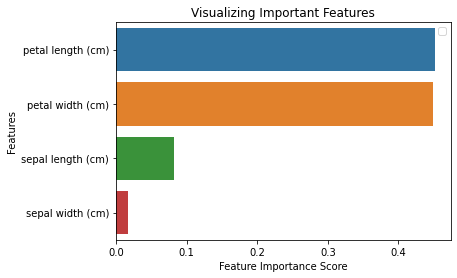

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

## Generating the Model on Selected Features

- hanya memilih 3 fitur saja, karena 'sepal width' memiliki tingkat kepentingannya yang sangat rendah

In [32]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]
y=data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5)

In [33]:
# setelah dipisahkan, maka perlu dibuat model pada training set features yang dipilih untuk melakukan prediksi pada set_features yang dipilih
from sklearn.ensemble import RandomForestClassifier 

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) 

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

# prediction on test set
y_pred=clf.predict(X_test) 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


- keakuratannya meningkat

# SVM (Support Vector Machines)

## Intro
- dianggap sebagai cara  pendekatan klasifikasi yang dapat digunakan pada  jenis klasifikasi dan regresi
- SVM dapat dengan mudah menangani beberapa variabel kontinyu dan kategorikal
- SVM membangun hyperplane dalam multidimensional space untuk memisahkan kelas yang berbeda
- SVM menghasilkan hyperplane optimal secara berulang yang digunakan untuk meminimalkam kesalahan
- SVM intinya berguna untuk menemukan maximum marginal hyperplane yang paling baik membagi dataset menjadi beberapa kelas

## Support Vectors
- data point yang paling dekat dengan hyperplane
- titik2 ini akan menentukan garis pemisah dengan lebih baik dengan menghitung margin

## Margin
- celah antara dua garis pada poin kelas yang terdekat
- margin dihitung sebagai jarak tegak lurus dari garis untuk mendukung vektor atau titik terdekat
- margin yang lebih besar dianggap sebagai margin yang baik
- margin yang lebih kecil dianggap margin yang buruk

## How dose SVM work?
- bertujuan untuk memisahkan kumpulan data yang diberikan dengan cara terbaik
- margin bertujuan untuk memisahkan hyperplane dengan kemungkinan margin maksimum antara support vektor dalam dataset yang diberikan
- hyperplane dapat dicari dengan langkah berikut :
    - hyperplane dihasilkan dengan memisahkan kelas dengan cara paling baik
    - hyperplane dipilih dengan regresi maksimum dari salah satu titik data terdekat

## Dealing with non-llinear and insperable planes
- beberapa masalah tidak dapat diselesaikan dengan menggunakan linear hyperplane
- SVM menggunkan karnel untuk mengubah input space ke ruang dimensi yang lebih tingi 

## SVM Kernels
- algoritma SVM diimplementasikan dalam praktiknya dengan menggunkan kernel
- kernel mengubah input data spce menjadi bentuk yang diperlukan
- kernel mengambil low dimensional input space dan mengubahnya menjadi ruang berdimensi lebih tinggi atau dengan kata lain SVM mengubah nonseparable problem menjadi separable problem dengan menambahkan lebih banyak dimensi
- SVM sangat berguna dalam masalah pemisihan non-linear
- kernel dapat membantu untuk membuat pengklasifikasi yang lebih akurat
- Jenis kernel :
    - Linear kernel = digunakan sebagai dot product pada dua pengamatan yang diberikan. Merupakan hasil perkalian antara dua vektor yang merupakan hasil perkalian setiap pasang nilai masukan
    - Polynomial kernel = bentuk kernel yang lebih umu, dapat membedakan ruang masukan lengkung atau non linear
    - Radial basis function kernel = fungsi kernel yang populer dalam support vector machine classification. RBF mampu memetakan ruang masukan dalam ruang dimensi yang tak terhingga



## Classifier Building in Scikit-learn

- data memiliki dua jenis kelas kanker :
    - malignant (berbahaya)
    - benign (tidak berbahaya)
- mengelompokan jenis kanker

In [34]:
# LOADING DATA
## memuat kumpulan data yang diperlukan

#Import scikit-learn dataset library
from sklearn import datasets 

#Load dataset
cancer = datasets.load_breast_cancer()

In [35]:
# EXPLORING DATA

# print the names of the 13 features
print("Features: ", cancer.feature_names) 

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
print(cancer.data.shape)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
(569, 30)


In [36]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [37]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [38]:
# SPLITING DATA
# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [39]:
# MEMBUAT MODEL
#Import svm model
from sklearn import svm 

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train) 

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [40]:
# MENGUJI MODEL

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [41]:
# PRECISION DAN RECALL MODEL
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred)) 

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


### Excercise : Multiple Algorithm on Dataset

In [42]:
import pandas as pd
import numpy as np

train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [44]:
print("Train Data:")
print(train.isnull().sum(), "\n")

Train Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 



In [45]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

/tmp/ipykernel_16278/3869796577.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(),inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

X=train.drop('Loan_Status',1)
y=train.Loan_Status

X=pd.get_dummies(X)
train=pd.get_dummies(train)

X.head()

/tmp/ipykernel_16278/2926133226.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=train.drop('Loan_Status',1)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [48]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2)

In [50]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

/home/jefl5/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [52]:
pred_cv=model.predict(x_cv)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8211382113821138
[[12 19]
 [ 3 89]]


In [54]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [55]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DecisionTreeClassifier()

In [56]:
pred_cv1=dt.predict(x_cv)

In [57]:
print(accuracy_score(y_cv,pred_cv1))
matrix1=confusion_matrix(y_cv,pred_cv1)
print(matrix1)

0.7479674796747967
[[16 15]
 [16 76]]


In [58]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier()

In [60]:
pred_cv2=rf.predict(x_cv)

In [61]:
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.8292682926829268
[[12 19]
 [ 2 90]]


In [62]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [63]:
svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC()

In [64]:
pred_cv3=svm_model.predict(x_cv)

In [65]:
print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.7479674796747967
[[ 0 31]
 [ 0 92]]


In [66]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

pred_cv4=nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.7967479674796748
[[14 17]
 [ 8 84]]


In [67]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv5=kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

0.6910569105691057
[[ 9 22]
 [16 76]]


/home/jefl5/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [68]:
print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4))
print("KNN:", accuracy_score(y_cv,pred_cv5))

Logistic Regression: 0.8211382113821138
Decision Tree: 0.7479674796747967
Random Forest: 0.8292682926829268
SVM: 0.7479674796747967
Naive Bayes: 0.7967479674796748
KNN: 0.6910569105691057


In [69]:
predictions=pd.DataFrame(pred_cv2, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')